In [ ]:
import requests
from bs4 import BeautifulSoup
import urllib 

기술스택 키워드는 이부분에서 키워드 추출

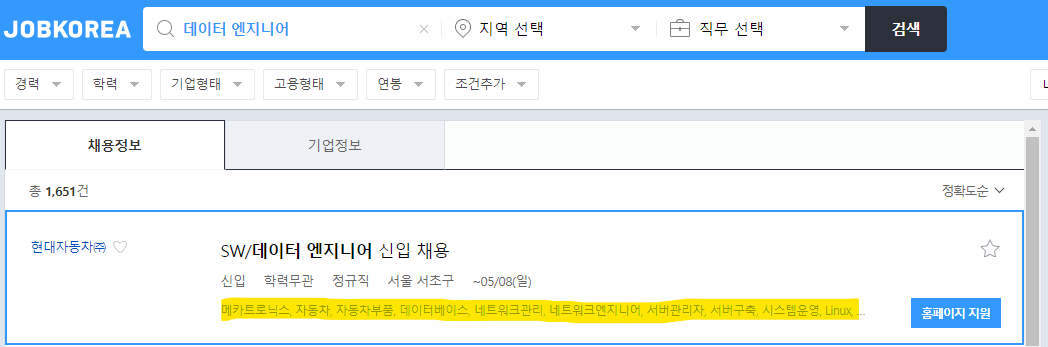

In [ ]:
def crawl_jobkorea(job):
    # url 한글 인코딩
    job_for_search = urllib.parse.quote(job)
    job_list = []
    
    # 5페이지 이후부터는 관련없는 채용들이 많이 등장하여 5페이지 까지만 검색
    for i in range(1, 6):
        url = f"https://www.jobkorea.co.kr/Search/?stext={job_for_search}&tabType=recruit&Page_No={i}"
        res = requests.get(url)
        soup = BeautifulSoup(res.content, 'html.parser')
        job_postings = soup.select("li.list-post")
        for post in job_postings:
            try:
                company = post.select_one("div.post-list-corp > a").text
                exp = post.select_one("p.option > span").text
                skills = post.select_one("p.etc").text
                
                job_list.append({"기업" : company,"경력" : exp, "기술" : skills})
                
            except:
                continue

    return job_list    
    print(job_list)

In [ ]:
crawl_jobkorea("데이터 엔지니어")

In [ ]:
crawl_jobkorea("데이터 사이언티스트")

In [ ]:
crawl_jobkorea("데이터 분석가")

# mongodb 연동 수정 코드

In [ ]:
import pymongo

In [ ]:
client = pymongo.MongoClient("mongodb://{ID}:{PWD}@{HOST}:{PORT}")
client

MongoClient(host=['host:27017'], document_class=dict, tz_aware=False, connect=True)

In [ ]:
db = client.job_korea

In [ ]:
def crawl_jobkorea(job):
    # url 한글 인코딩
    job_for_search = urllib.parse.quote(job)
    job_list = []
    
    # 5페이지 이후부터는 관련없는 채용들이 많이 등장하여 5페이지 까지만 검색
    for i in range(1, 6):
        url = f"https://www.jobkorea.co.kr/Search/?stext={job_for_search}&tabType=recruit&Page_No={i}"
        res = requests.get(url)
        soup = BeautifulSoup(res.content, 'html.parser')
        job_postings = soup.select("li.list-post")
        for post in job_postings:
            try:
                company = post.select_one("div.post-list-corp > a").text
                exp = post.select_one("p.option > span").text
                skills = post.select_one("p.etc").text
                
                job_list.append({"기업" : company,"경력" : exp, "기술" : skills})
                doc = {
                    "기업" : company,
                    "경력" : exp,
                    "기술" : skills
                }
                db.jobs.insert_one(doc)
            except:
                continue

    return job_list    
    print(job_list)

## 저장 성공입니다.

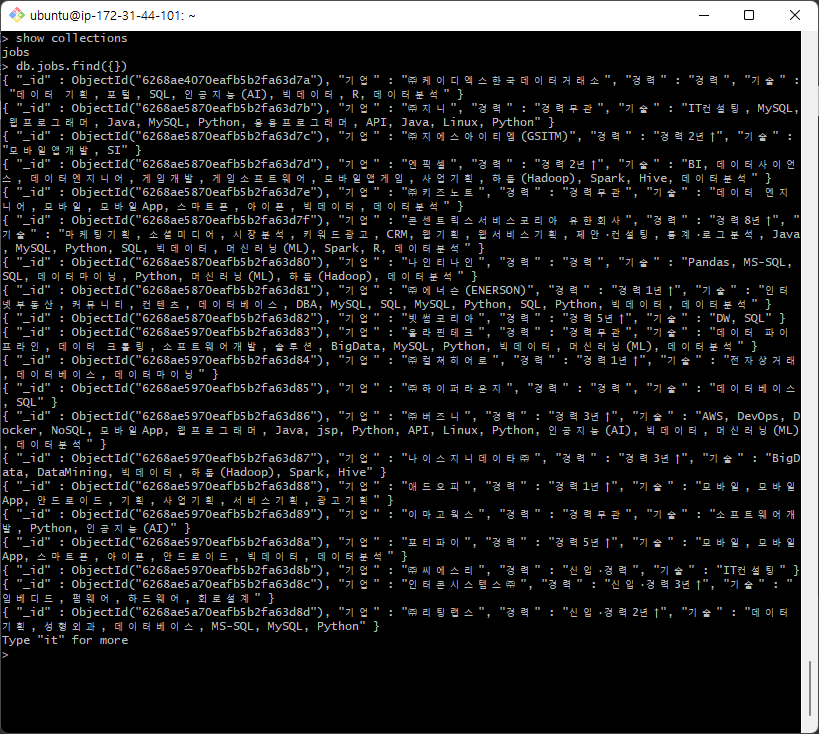

# 2차 수정
- job_korea라는 하나의 데이터베이스 안에 de_jobs, ds_jobs, da_jobs 직업별로 각각의 collection을 생성하여 저장하였습니다.
- job 파라미터에 따라서 mongodb 저장부분 자동으로 변경되도록 좀더 고민할 필요가 있어 보입니다.

In [ ]:
import pymongo

In [ ]:
HOST = "HOST"
PORT = "27017"
client = pymongo.MongoClient(f"{HOST}:{PORT}")
client

MongoClient(host=['host:27017'], document_class=dict, tz_aware=False, connect=True)

In [ ]:
db = client.job_korea

In [ ]:
# 데이터 엔지니어
def crawl_jobkorea_de(job):
    # url 한글 인코딩
    job_for_search = urllib.parse.quote(job)
    job_list = []
    
    # 5페이지 이후부터는 관련없는 채용들이 많이 등장하여 5페이지 까지만 검색
    for i in range(1, 6):
        url = f"https://www.jobkorea.co.kr/Search/?stext={job_for_search}&tabType=recruit&Page_No={i}"
        res = requests.get(url)
        soup = BeautifulSoup(res.content, 'html.parser')
        job_postings = soup.select("li.list-post")
        for post in job_postings:
            try:
                company = post.select_one("div.post-list-corp > a").text
                exp = post.select_one("p.option > span").text
                skills = post.select_one("p.etc").text
                
                job_list.append({"기업" : company,"경력" : exp, "기술" : skills})
                doc = {
                    "기업" : company,
                    "경력" : exp,
                    "기술" : skills
                }
                # 이 부분 좀더 고민해보기 (de, ds, da 자동으로 적용되도록)
                db.de_jobs.insert_one(doc)
            except:
                continue

    return job_list    
    print(job_list)

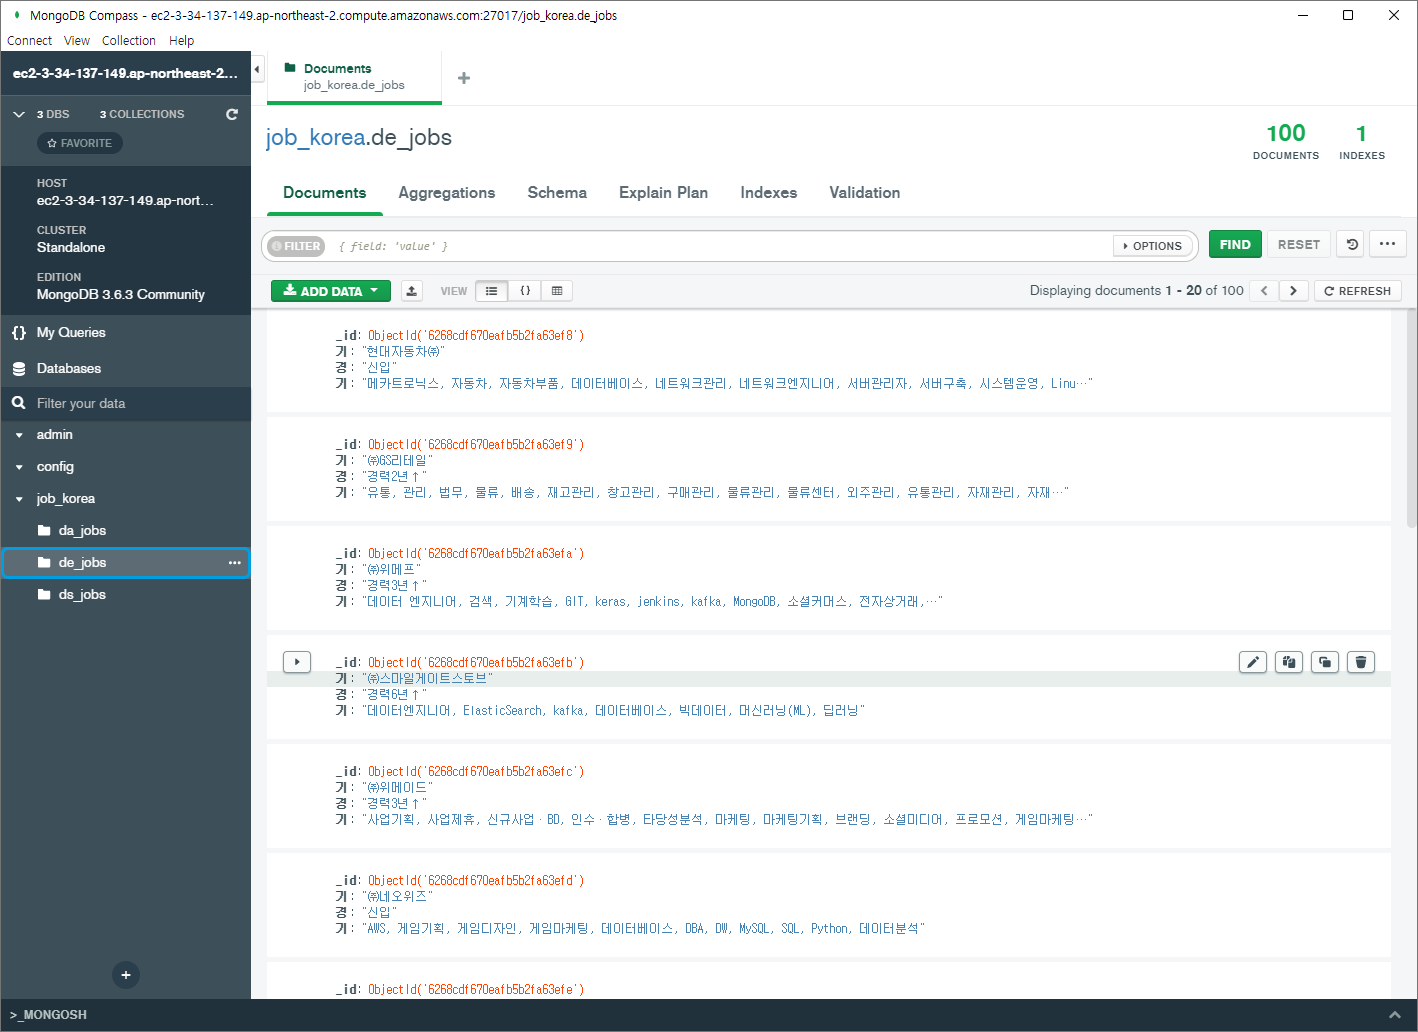

In [ ]:
# 데이터 사이언티스트
def crawl_jobkorea_ds(job):
    # url 한글 인코딩
    job_for_search = urllib.parse.quote(job)
    job_list = []
    
    # 5페이지 이후부터는 관련없는 채용들이 많이 등장하여 5페이지 까지만 검색
    for i in range(1, 6):
        url = f"https://www.jobkorea.co.kr/Search/?stext={job_for_search}&tabType=recruit&Page_No={i}"
        res = requests.get(url)
        soup = BeautifulSoup(res.content, 'html.parser')
        job_postings = soup.select("li.list-post")
        for post in job_postings:
            try:
                company = post.select_one("div.post-list-corp > a").text
                exp = post.select_one("p.option > span").text
                skills = post.select_one("p.etc").text
                
                job_list.append({"기업" : company,"경력" : exp, "기술" : skills})
                doc = {
                    "기업" : company,
                    "경력" : exp,
                    "기술" : skills
                }
                # 이 부분 좀더 고민해보기 (de, ds, da 자동으로 적용되도록)
                db.ds_jobs.insert_one(doc)
            except:
                continue

    return job_list    
    print(job_list)

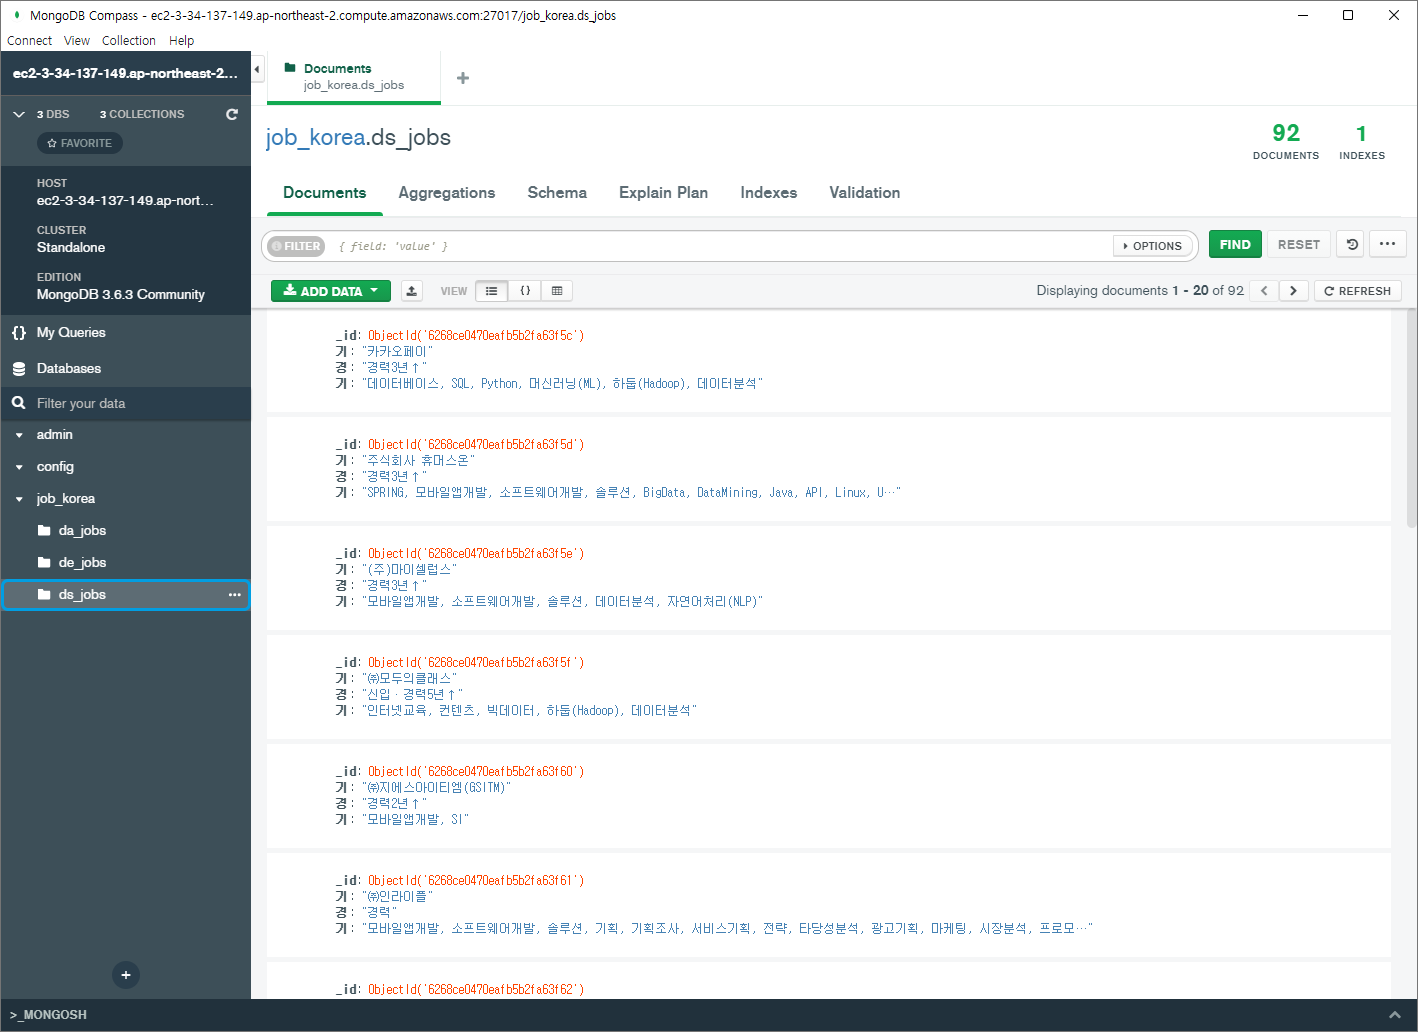

In [ ]:
# 데이터 분석가
def crawl_jobkorea_da(job):
    # url 한글 인코딩
    job_for_search = urllib.parse.quote(job)
    job_list = []
    
    # 5페이지 이후부터는 관련없는 채용들이 많이 등장하여 5페이지 까지만 검색
    for i in range(1, 6):
        url = f"https://www.jobkorea.co.kr/Search/?stext={job_for_search}&tabType=recruit&Page_No={i}"
        res = requests.get(url)
        soup = BeautifulSoup(res.content, 'html.parser')
        job_postings = soup.select("li.list-post")
        for post in job_postings:
            try:
                company = post.select_one("div.post-list-corp > a").text
                exp = post.select_one("p.option > span").text
                skills = post.select_one("p.etc").text
                
                job_list.append({"기업" : company,"경력" : exp, "기술" : skills})
                doc = {
                    "기업" : company,
                    "경력" : exp,
                    "기술" : skills
                }
                # 이 부분 좀더 고민해보기 (de, ds, da 자동으로 적용되도록)
                db.da_jobs.insert_one(doc)
            except:
                continue

    return job_list    
    print(job_list)

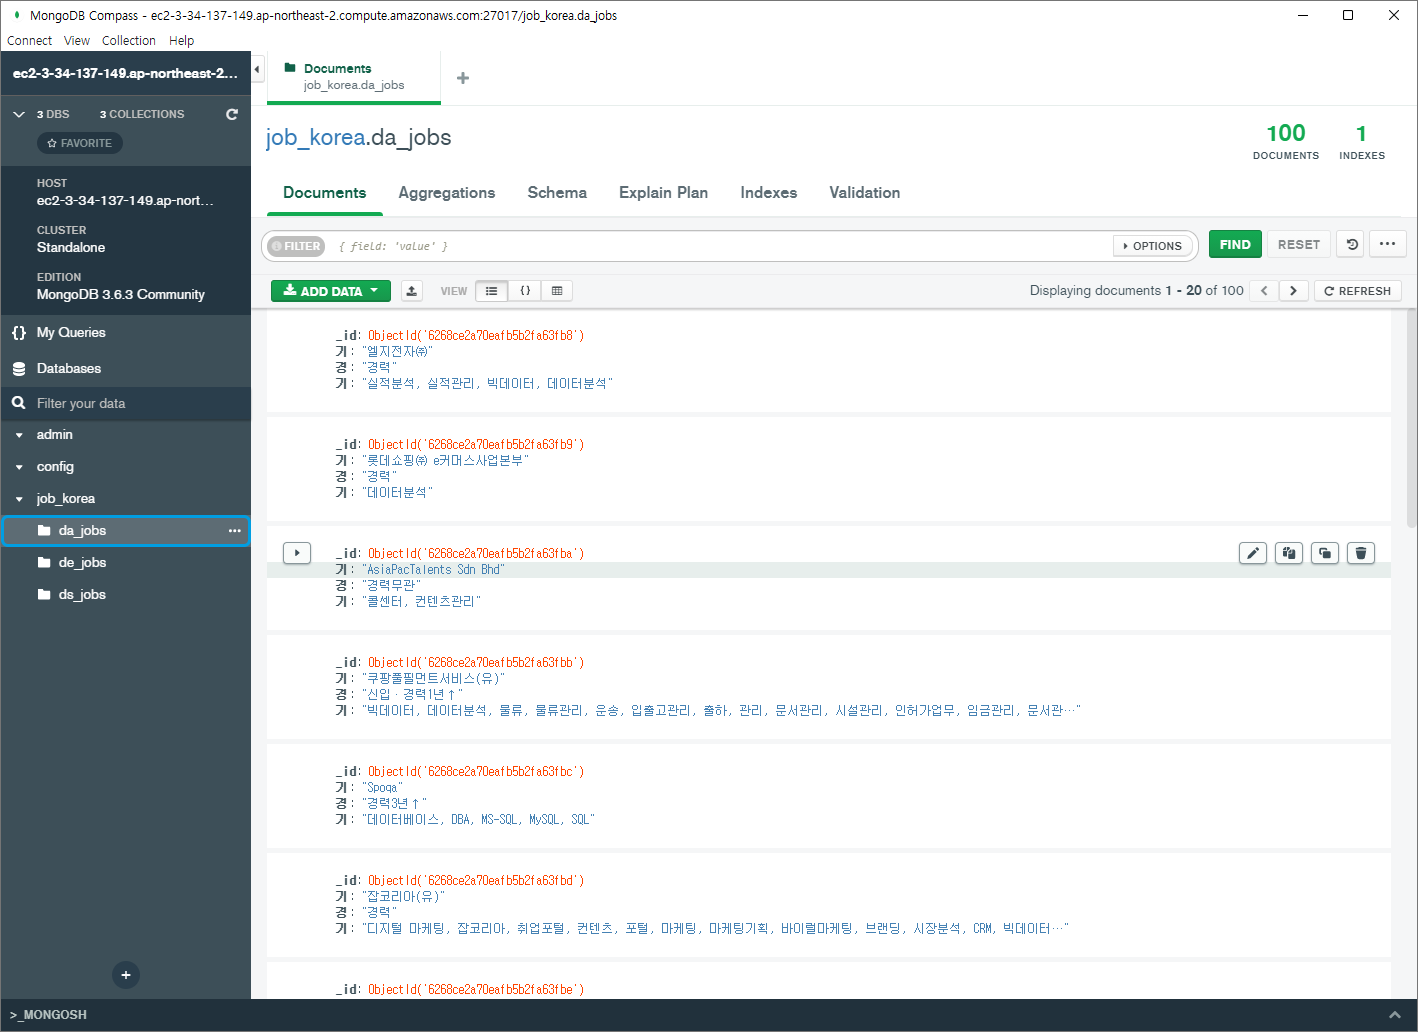